Aditya Narayan Panda
FET/BCE/2021-25/005

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("ForSVM.csv")

In [3]:
df

,x,y,label
0,3,1,1
1,3,-1,1
2,6,1,1
3,6,-1,1
4,1,0,0
5,0,1,0
6,0,-1,0
7,-1,0,0


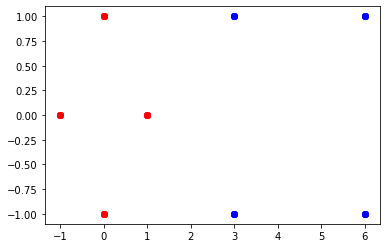

In [4]:
#Plotting the points, red for negative label and blue for positive label
for i in df['label']:
    if i==0:
        plt.scatter(df.loc[df['label']==i,'x'],df.loc[df['label']==i,'y'],c='red')
    else:
        plt.scatter(df.loc[df['label']==i,'x'],df.loc[df['label']==i,'y'],c='blue')

In [5]:
s1=[1,0]
s2=[3,1]
s3=[3,-1]

In [6]:
#adding bias
s1.append(1)
s2.append(1)
s3.append(1)
S1=s1
S2=s2
S3=s3

In [7]:
#Calculating Products
S1S1=0
S2S2=0
S3S3=0
S2S1=0
S3S1=0
S2S3=0
for i in range(3):
    S1S1+=S1[i]*S1[i]
    S2S2+=S2[i]*S2[i]
    S3S3+=S3[i]*S3[i]
    S2S1+=S2[i]*S1[i]
    S3S1+=S3[i]*S1[i]
    S2S3+=S2[i]*S3[i]
S1S2=S2S1
S1S3=S3S1
S3S2=S2S3

In [8]:
#Creating linear equations
from sympy import symbols,Eq,solve

a1,a2,a3=symbols('a1,a2,a3')

eq1=Eq((a1*S1S1+a2*S2S1+a3*S3S1),-1)
print(eq1)

eq2=Eq((a1*S1S2+a2*S2S2+a3*S3S2),1)
print(eq2)

eq3=Eq((a1*S1S3+a2*S2S3+a3*S3S3),1)
print(eq3)

Eq(2*a1 + 4*a2 + 4*a3, -1)
Eq(4*a1 + 11*a2 + 9*a3, 1)
Eq(4*a1 + 9*a2 + 11*a3, 1)


In [9]:
#Solving linear equations
val=solve((eq1,eq2,eq3),(a1,a2,a3))

In [10]:
#Changing datatype to float
val[a1]=float(val[a1])
val[a2]=float(val[a2])
val[a3]=float(val[a3])

In [11]:
#Values of alpha in dictionary format
val

{a1: -3.5, a2: 0.75, a3: 0.75}

In [12]:
#Calculating W
a1S1=[]
a2S2=[]
a3S3=[]
for i in range(3):
    a1S1.append(val[a1]*S1[i])
    a2S2.append(val[a2]*S2[i])
    a3S3.append(val[a3]*S3[i])
W=[]
for i in range(3):
    W.append(a1S1[i]+a2S2[i]+a3S3[i])

In [13]:
W

[1.0, 0.0, -2.0]

In [14]:
#separating w and bias
w=W[:2]
b=W[2]

In [15]:
w

[1.0, 0.0]

In [16]:
b

-2.0

In [17]:
b=abs(b)

In [18]:
b

2.0

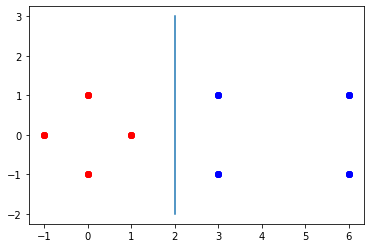

In [19]:
#Plotting the hyperplane and data points
i=[-2,3]
B=[b,b]
plt.plot(B,i)
for i in df['label']:
    if i==0:
        plt.scatter(df.loc[df['label']==i,'x'],df.loc[df['label']==i,'y'],c='red')
    else:
        plt.scatter(df.loc[df['label']==i,'x'],df.loc[df['label']==i,'y'],c='blue')